# Chart Configuration

Altair provides a number of hooks to configure the look of your chart; we don't have time to go into all the available options here, but it is useful to know where and how such configuration settings can be accessed and explored.

In general, there are two or three places where the look of a chart can be controlled, each with a greater priority than the last.

1. **Top Level Chart Config**. At the top level of an Altair chart, you can specify configuration settings that will apply to every panel or layer in the chart.

2. **Local Configuration Settings**. The top-level settings can be over-ridden locally, by specifying local configuration

3. **Encoding Values**. If an encoding value is specified, it will take highest precedance, and override the other options.

Let's see an example.

In [1]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)

data = pd.DataFrame(np.random.randn(100, 2), columns=['x', 'y'])

## Example 1: Controlling Marker Properties

Suppose you would like to control the color of the markers in a scatter plot: let's see each of the three options for doing this. We'll use a simple datasets of normally-distributed points:

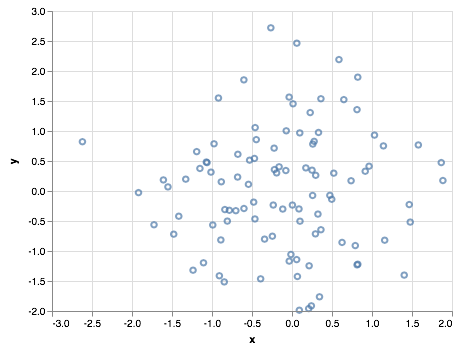

In [3]:
alt.Chart(data).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

### Top-level configuration

At the top level, Altair has a ``configure_mark()`` method that allows you to adjust a large number of configuration settings for marks in general, as well as a ``configure_point()`` property that specifically adjusts the properties of points.

You can see the availale options in Jupyter in the documentation string, accessed with a question mark:

In [4]:
alt.Chart.configure_point?

Signature: alt.Chart.configure_point(self, align=Undefined, angle=Undefined, baseline=Undefined, color=Undefined, cursor=Undefined, dx=Undefined, dy=Undefined, fill=Undefined, fillOpacity=Undefined, filled=Undefined, font=Undefined, fontSize=Undefined, fontStyle=Undefined, fontWeight=Undefined, href=Undefined, interpolate=Undefined, limit=Undefined, opacity=Undefined, orient=Undefined, radius=Undefined, shape=Undefined, size=Undefined, stroke=Undefined, strokeCap=Undefined, strokeDash=Undefined, strokeDashOffset=Undefined, strokeOpacity=Undefined, strokeWidth=Undefined, tension=Undefined, text=Undefined, theta=Undefined, **kwds)
Docstring:
MarkConfig schema wrapper

Mapping(required=[])

Attributes
----------
align : HorizontalAlign
    The horizontal alignment of the text. One of ``"left"``, ``"right"``, ``"center"``.
angle : float
    The rotation angle of the text, in degrees.
baseline : VerticalAlign
    The vertical alignment of the text. One of ``"top"``, ``"middle"``, ``"bottom"

This top-level configuration should be thought of as a chart theme: they are the default settings for the aesthetics of all chart elements.
Let's use ``configure_point`` to set some properties of points:

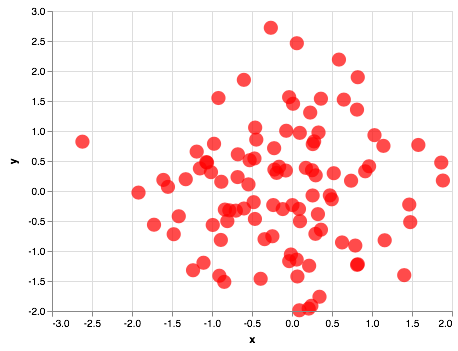

In [5]:
alt.Chart(data).mark_point().encode(
    x='x:Q',
    y='y:Q'
).configure_point(
    size=200,
    color='red',
    filled=True
)

Many local configurations are available; you can use Jupyter's tab-completion and help features to explore them

In [ ]:
# type alt.Chart.configure then the TAB key to see available configurations
alt.Chart.configure_

## Local Mark Configuration

Within the ``mark_point()`` method, you can pass local configurations that will override the top-level configuration settings.
The arguments are the same as that of ``configure_mark``.

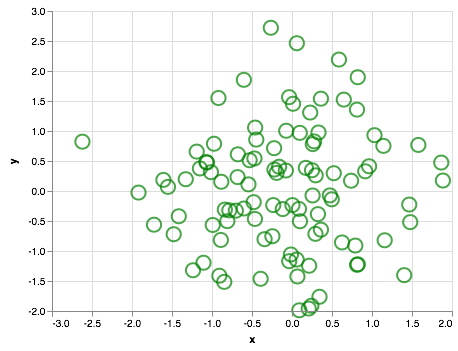

In [7]:
alt.Chart(data).mark_point(color='green', filled=False).encode(
    x='x:Q',
    y='y:Q'
).configure_point(
    size=200,
    color='red',
    filled=True
)

Notice here that the "color" and "fill" configurations are overridden by the local configurations, but the "size" remains the same as before.

## Encoding Configuration

Finally, the highest precedence setting is the "encoding" setting. Here let's set the color to "steelblue" within the encoding:

In [ ]:
alt.Chart(data).mark_point(color='green', filled=False).encode(
    x='x:Q',
    y='y:Q',
    color=alt.value('steelblue')
).configure_point(
    size=200,
    color='red',
    filled=True
)

Now this is a bit of a contrived example, but it's useful to help grasp the various places that properties of marks can be set.

## Example 2: Chart and Axis Titles

Chart and axis titles are set automatically based on the data source, but sometimes it is useful to change them.
For example, here is a histogram of the above data:

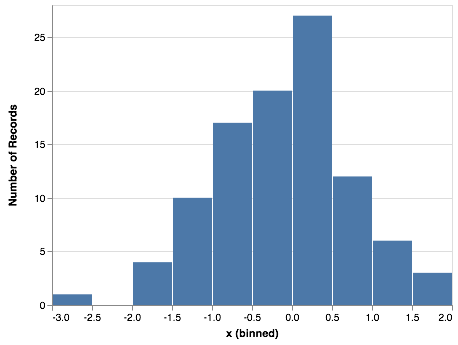

In [8]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True),
    y=alt.Y('count()')
)

We can explicitly set the axis titles using the ``title`` argument to the encoding:

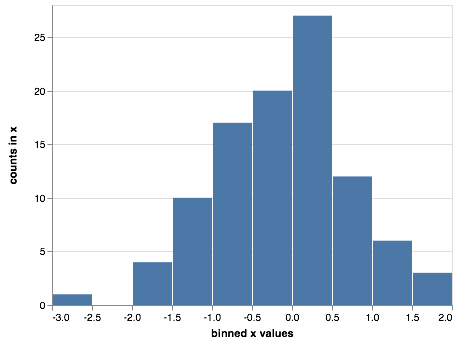

In [9]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, title='binned x values'),
    y=alt.Y('count()', title='counts in x')
)

Likewise, we can set the ``title`` property of the chart within the chart properties:

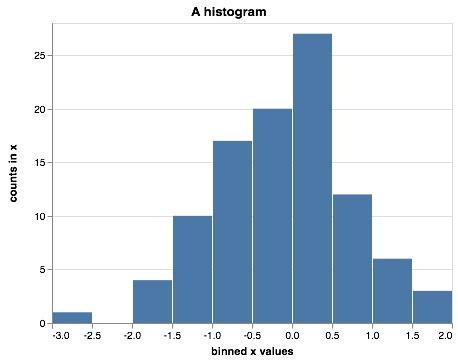

In [10]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, title='binned x values'),
    y=alt.Y('count()', title='counts in x')
).properties(
    title='A histogram'
)

## Example 3: Axis Properties

If you would like to set the properties of the axes, including grid lines, you can use the encodings'``axis`` argument.

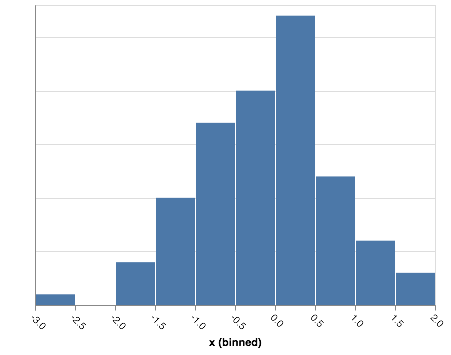

In [11]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('count()', axis=alt.Axis(labels=False, ticks=False, title=None))
)

Note that some of these values can be adjusted at the top-level configuration as well, if you want them to apply to the chart as a whole. For example:

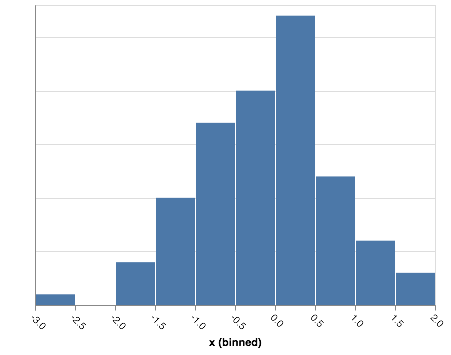

In [12]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True),
    y=alt.Y('count()', axis=alt.Axis(labels=False, ticks=False, title=None))
).configure_axisX(
    labelAngle=45
)

## Example 4: Scale properties & axis limits

Each encoding also has a ``scale`` that allows you to adjust things like axis limits and other scale properties.

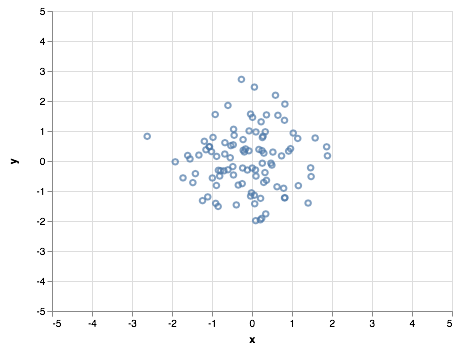

In [13]:
alt.Chart(data).mark_point().encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-5, 5])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-5, 5])),
)

Note that if you shrink the scale to smaller than the range of the data, the data will extend beyond the scale by default:

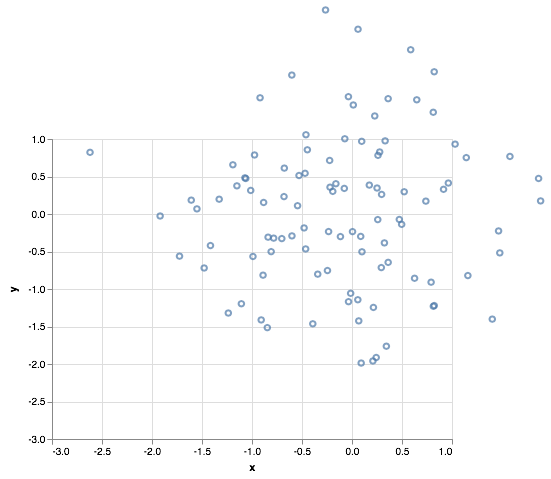

In [14]:
alt.Chart(data).mark_point().encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-3, 1])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-3, 1])),
)

Not hiding data is a useful default in exploratory visualization, because it prevents you from inadvertently missing data points.

If you would like the markers to be clipped beyond the range of the scales, you can set the ``clip`` property of marks:

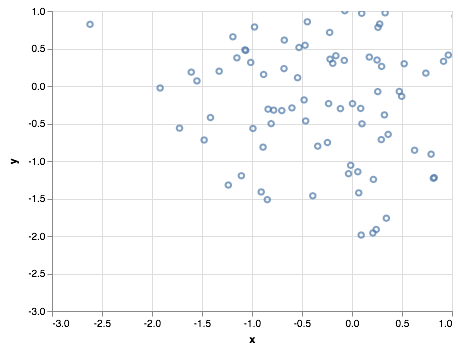

In [15]:
alt.Chart(data).mark_point(clip=True).encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-3, 1])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-3, 1])),
)

Another useful approach is to instead "clamp" the data to the extremes of the scale, keeping it visible even when it is out of range:

In [ ]:
alt.Chart(data).mark_point().encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-3, 1], clamp=True)),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-3, 1], clamp=True)),
).interactive()

## Example 5: Color Scales

Sometimes it's useful to manually adjust a color scale used

In [ ]:
from vega_datasets import data
weather = data.seattle_weather()
weather.head()

In [ ]:
alt.Chart(weather).mark_point().encode(
    x='date:T',
    y='temp_max:Q',
    color='weather:N'
)

You can change the color scheme by using the color scale property, and by referencing any of [Vega's named color schemes](https://vega.github.io/vega/docs/schemes/#reference):

In [ ]:
alt.Chart(weather).mark_point().encode(
    x='date:T',
    y='temp_max:Q',
    color=alt.Color('weather:N', scale=alt.Scale(scheme="dark2"))
)

Alternatively, you can create your own color scheme by specifying a color domain and range:

In [ ]:
colorscale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                       range=['goldenrod', 'gray', 'lightblue', 'steelblue', 'midnightblue'])

alt.Chart(weather).mark_point().encode(
    x='date:T',
    y='temp_max:Q',
    color=alt.Color('weather:N', scale=colorscale)
)

## Exercise: Adjusting Plots

Take about 10 minutes now and practice adjusting the aesthetics of your plots.

Use your favorite visualization from the previous exercise, and adjust the aesthetics of the plot:

- customize the look of the marks (size, strokewidth, etc.)
- change axes and plot titles
- change the x and y limits

Use tab-completion on ``alt.Chart.configure_`` to see the various configuration options, then use ``?`` to see the documentation on what the options do.